# $$\text{Análisis y Selección de Variables para nuestro Modelo}$$

In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_train = pd.read_excel('../bike_train.xlsx')
bike_train.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


- Lo que podemos suponer a primera vista, no usaremos la columna dteday ya que no queremos que el modelo dependa de una fecha que nunca es igual al anterior o al del dia siguiente. Lo que si podemos decir es que esta fecha ha sido dividida en columnas más independientes como la estación del año (season), el mes del año en el que ocurre el evento (mnth), la hora del registro (hr), la semana en la que ocurre (weekday). Que son eventos que se repiten siempre.

- La columna "yr" nos indica el año en que la persona se hizo cliente, para este problema no requerimos ese dato, ya que buscamos la cantidad total de consumidores (independiente de si son clientes o consumidores casuales). Para un problema en el que nos pidan monitorizar a los clientes registrados quizás pueda ser un variable a considerar.

- Finalmente, tampoco usaremos las columnas "casual" y "registered", ya que queremos calcular la cantidad total de registrados, independientemente si son clientes vips de la empresa o solo toman el servicio cuando lo necesitan.

In [3]:
#Nuestra variable de predicción es la cantidad total de regsitrados (cnt), y veremos si existen alguna relación directa
# o inderecta entre las columnas = [season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed]

new_bike_train = bike_train.drop(['yr','dteday','casual','registered'], axis=1)
new_bike_train.head(2)

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


In [4]:
#Correlación de Pearson
new_bike_train.corr()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,1.000000,0.118039,0.167195,-0.007446,0.008323,0.007103,0.005295,-0.015359,0.029297,0.042490,-0.013275,-0.029001,0.229814
season,0.118039,1.000000,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.111369
mnth,0.167195,0.865268,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.073431
hr,-0.007446,-0.007610,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.396698
holiday,0.008323,-0.008928,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,-0.030304
weekday,0.007103,-0.003688,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.022618
workingday,0.005295,0.012630,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,0.025132
weathersit,-0.015359,-0.009029,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.149848
temp,0.029297,0.410790,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.395743
atemp,0.042490,0.413196,0.358541,0.134633,-0.038005,-0.009841,0.066305,-0.081386,0.991785,1.000000,-0.003669,-0.057619,0.395234


Podemos decir que:
- Existe una correlación fuerte entre season-mnth, esto es bien sabido ya que las estaciones del año cambian en el trancurso de los meses.
- Existe una correlación fuerte entre temp-atemp, donde podemos prescindir de uno de las dos variables. Por lo que podriamos usar atemp (sensación térmica) como una de las variables importantes para nuestro entrenamiento.
- Existe una correlación media entre season-temp y season-atemp, donde la estación del año influye a la temperatura del lugar.
- Existe una correlación media entre weathersit-hum.
- Existe una correlación media-baja entre temp-cnt y atemp-cnt, y es una de la correlaciones más importantes a mi parecer, ya que nos indica el clima influye al comportamiento de alquilar una bicicleta.
- Otra correlación media-baja importante es hr-cnt, que nos indica que el comportamiento de los alquileres influye respecto al horario.
- Finalmente existe una correlación baja entre cnt-hum, donde el comportamiento de los alquileres influye respecto al clima en el día.

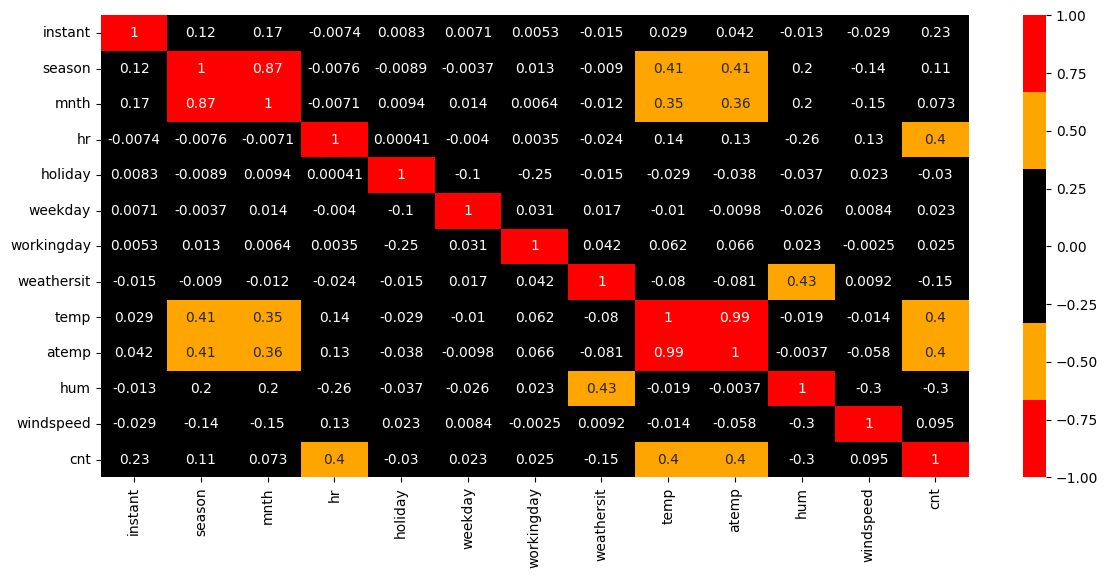

In [5]:
#Mapa de Calor de la Matriz de Correlaciones
colormap = sns.color_palette(['red','orange','black','black','orange','red'])
plt.figure(figsize=(14,6))
sns.heatmap(new_bike_train.corr(), annot=True,cmap=colormap, vmin=-1,vmax=1)
plt.show()

Para nuestro mapa de calor, hemos coloreado a las variables con mayor correlación de rojo, y los de correlación media y baja-media de naranja. Con lo cual podemos confirmar lo dicho anteriormente. 
Para nuestra varible "cnt" que queremos predecir tendría una correlación media-baja con los valores de temperatura, sensación termica y hora del día. Y casi nula relación con el resto de variables.
Lo que nos hace creer que un posible modelo de regresión logística no sería el adecuado para entrenar estos datos.

### $\text{Dias festivos (holiday)}$

In [6]:
fig = px.histogram(new_bike_train, x="holiday", y="cnt",template='plotly_dark',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(height=250, width=500)
fig.show()
print("Numero de veces en el que el dia festivo cae un feriado: ",new_bike_train.holiday[new_bike_train['holiday'] == 1].count())
print("Numero de veces en las que hay un dia no festivo: ",new_bike_train.holiday[new_bike_train['holiday'] == 0].count())
print("cantidad de registrados  dia festivo no es feriado: ",new_bike_train.cnt[new_bike_train['holiday'] == 1].sum())
print("cantidad de registrados donde no es dia festivo: ",new_bike_train.cnt[new_bike_train['holiday'] == 0].sum())


Numero de veces en el que el dia festivo cae un feriado:  333
Numero de veces en las que hay un dia no festivo:  11666
cantidad de registrados  dia festivo no es feriado:  43770
cantidad de registrados donde no es dia festivo:  1859211


In [7]:
#semanas en el que cae un dia festivo que es feriado
new_bike_train[new_bike_train['holiday'] == 1].weekday.unique()

array([1, 5, 4])

In [8]:
# promedio de registrados en un dia festivo que cae feriado contra un dia normal (sea feriado o no)
new_bike_train.groupby('holiday').mean()

,instant,season,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
holiday,,,,,,,,,,,,
0,5995.129522,2.212326,5.524859,11.556146,3.044060,0.703583,1.436654,0.466612,0.449977,0.627013,0.195952,159.370050
1,6170.627628,2.153153,5.720721,11.573574,1.792793,0.000000,1.378378,0.433874,0.410731,0.582222,0.213266,131.441441


Podriamos pensar que es en los días no festivos es donde más registrados hay. Pero, si vemos el número de veces que hay de días festivos, es también muy inferior a los dias no festivos.

También podemos ver que el promedio de registrados en un día no festivo con feriado es superior a los dias festivos con feriado. Lo que nos hace suponer que no sea una variable que sea de importancia para el modelo.

Otro dato a tomar en cuenta es que esta variable puede afectar al balanceo de carga. Descartandola como una variable para nuestro modelo de entrenamiento!

### $\text{Estaciones del año, meses del año, dias de la semana, horas del día y dias laborales}$

In [9]:
# promedio de dias laborales y no laborales
new_bike_train.groupby('workingday').mean()

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
workingday,,,,,,,,,,,,
0,5973.013453,2.190451,5.497758,11.521498,0.08784,2.917700,1.394619,0.448425,0.432339,0.619037,0.196893,152.996571
1,6012.464181,2.220029,5.545322,11.572856,0.00000,3.051657,1.453704,0.473684,0.456532,0.628879,0.196220,161.180677


Es en los días laborales donde hay un aumento significativo de registrados.

In [10]:
# cantidad de registrados en el dia de la semana
dias_semana = new_bike_train.groupby('weekday').sum()
fig = px.pie(values=dias_semana.cnt, names=dias_semana.index, hole=.3,color_discrete_sequence=px.colors.sequential.RdBu, template='plotly_dark')
fig.update_layout(height=350, width=600, margin=dict(l=20, r=20, t=20, b=20))
fig.show()

Existe un ligero aumento de registrados para los dias: Martes,Jueves, Viernes y Sábado

In [11]:
# promedio de registrados en las horas durante el día
dias_semana = new_bike_train.groupby('hr').mean()
fig = px.bar(y=dias_semana.cnt, x=dias_semana.index,color_discrete_sequence=px.colors.sequential.RdBu, template='plotly_dark')
fig.update_layout(height=350, width=700, margin=dict(l=20, r=20, t=20, b=20))
fig.update_xaxes(title_text="Horas del día")
fig.update_yaxes(title_text="Cantidad de registrados")
fig.show()

Podemos ver que el aumento de registros durante el día es entre las 7 am y 8 pm, siendo los horarios de 8 am, 5 pm y 6 pm los de mayor registrados en el día.
Podemos asegurar entonces que esta variable será de gran importancia para nuestro modelo de entrenamiento.

In [12]:
# cantidad de registrados durante los meses del año, dividido por estaciones
fig = px.sunburst(new_bike_train, path=['season', 'mnth'], values='cnt',color_discrete_sequence=px.colors.sequential.RdBu, template='plotly_dark')
fig.update_layout(height=350, width=700, margin=dict(l=20, r=20, t=20, b=20))
fig.show()

Podemos ver que que para las estaciones del año (pie chart interno), es en verano donde se registran mayor cantidad de alquileres de biciletas. Dentro de este mes, son los meses 4 y 5, abril y mayo respectivamente, donde hay mayor registro de alquileres.

### $\text{Tipo de clima, nivel de humedad y velocidad del viento}$

In [13]:
new_bike_train.groupby('weathersit').sum()

,instant,season,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
weathersit,,,,,,,,,,,,
1,47439780,17475,43848,92109,223,23498,5269,3732.66,3591.1903,4453.30,1555.3200,1350224
2,18222491,6642,16483,34123,94,9253,2156,1398.26,1355.2130,2172.41,569.5837,455036
3,6313164,2406,6024,12401,16,3348,781,456.50,439.2429,880.25,231.4818,97498
4,18565,3,3,35,0,10,2,0.56,0.5607,2.65,0.6120,223


Hay más registrados cuando el dia es despejado, seguido de un dia con neblina y nubes. Y cae a medida que el clima emperoa.
Es una variable importante para nuestro modelo de entrenamiento!

In [14]:
humedad = new_bike_train.groupby('hum').sum()
fig = px.bar(y=humedad.cnt, x=humedad.index,color_discrete_sequence=px.colors.sequential.RdBu, template='plotly_dark')
fig.update_layout(height=350, width=900, margin=dict(l=20, r=20, t=20, b=20))
fig.update_xaxes(title_text="Nivel de humedad")
fig.update_yaxes(title_text="Cantidad de registrados")
fig.show()

No vemos un patrón en la distribución de los datos.

In [15]:
velocidad = new_bike_train.groupby('windspeed').sum()
fig = px.bar(y=velocidad.cnt, x=velocidad.index,color_discrete_sequence=px.colors.sequential.RdBu, template='plotly_dark')
fig.update_layout(height=300, width=700, margin=dict(l=20, r=20, t=20, b=20))
fig.update_xaxes(title_text="Velocidad del viento")
fig.update_yaxes(title_text="Cantidad de registrados")
fig.show()

Vemos que mientras la velocidad del viento aumenta, disminuye la cantidad de registros de alquiler de bicicletas.
Es una variable a considerar para nuestro modelo.

## Conclusión:

Las variables a considerar para nuestro modelo serán:

- instant
- season	
- mnth	
- hr		
- weekday	
- workingday	
- weathersit
- atemp	
- windspeed	

En cuanto a un modelo, descartamos la de regresión lineal, ya que las correlaciones entre las variables con el target son bajas o nulas. 
Descartamos también modelos de clasificasión, como: regressión logística. Ya que nos encontramos a un problema de regresión y no de clasificación.
Lo que si podemos usar es un modelo de bosques aleatorio o de redes neurales.

# $$\text{Entrenamiento}$$

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
new_bike_train.drop(['holiday','temp','hum'], axis=1, inplace=True)

## Bosques Aleatorios como predicción

In [18]:
X = new_bike_train[new_bike_train.columns[:-1]]
Y = new_bike_train.cnt
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
model = RandomForestRegressor(n_estimators=30)
model.fit(x_train,y_train)
print('score: ',model.score(x_test,y_test))

y_predict = model.predict(x_test)
print('RMSE: ',mean_squared_error(y_test,y_predict, squared=False))

score:  0.9361463245737441
RMSE:  37.20451047301976


# $$\text{Demostración del análisis}$$

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [20]:
#usaremos la tabla principal para probar nuestras conjeturas hechas en el análisis
bike_train.drop(['dteday','registered','casual'], axis=1, inplace=True)
bike_train.head(1)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16


In [21]:
#entrenamos nuevamente el modelo, pero esta vez con todas las posibles variables
X = bike_train[bike_train.columns[:-1]]
Y = bike_train.cnt
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
model = RandomForestRegressor(n_estimators=30)
model.fit(x_train,y_train)
print('score: ',model.score(x_test,y_test))

y_predict = model.predict(x_test)
print('RMSE: ',mean_squared_error(y_test,y_predict, squared=False))

score:  0.9405549379576665
RMSE:  36.84349588939481


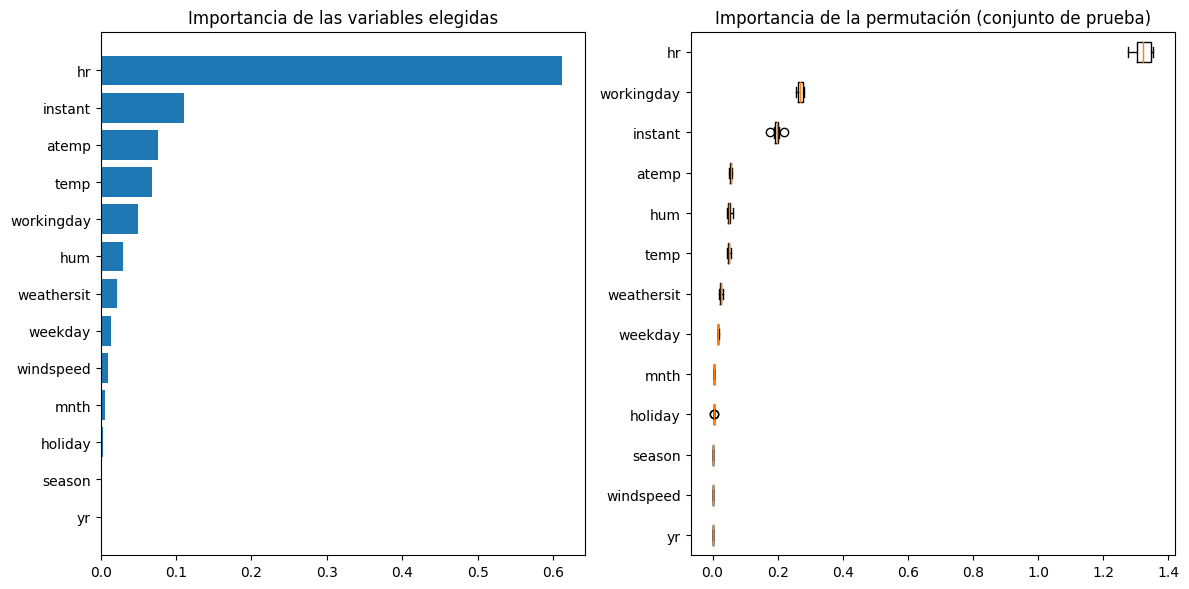

In [22]:
# para esta demostración, copiamos el código de un problema de regresión de la página de ejemplos de sklearn
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(bike_train.columns)[sorted_idx])
plt.title("Importancia de las variables elegidas")

result = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(bike_train.columns)[sorted_idx],
)
plt.title("Importancia de la permutación (conjunto de prueba)")
fig.tight_layout()
plt.show()

Podemos ver que nuestro análisis al momento de escoger las variables de mayor importancia:

- La variable "Holiday" (diás festivos) no es muy relevante para nuestro modelo. Justo lo predicho en el análisis.
- La variable "yr" (año del registro) tampoco es relevante, tal como se aseguró en el análisis.
- En cuanto a las variables "season" y "mnth", el modo tomo poca o nula importancia, esto es de sorprender ya que en nuestro análisis creíamos que serían de gran uso para el modelo.
- En cuanto a la variable "hum" (humedad), el modelo tomo media importancia para el entrenamiento. Algo que no vimos venir debido a que no encontramos un patrón en en esta variable.
- La variable "temp" (temperetura"), como se dijo en el análisis tendría casi la misma importancia que "atemp" . Pero hechar de menos a una de las dos no afectaría al entrenamiento.
- Finalmente, el modelo tomo poca importancia para las variables: "weekday","weathersit" y "windspeed"

### Usando un modelo de predicción diferente:

In [23]:
from sklearn.linear_model import LinearRegression

X_linear = bike_train[bike_train.columns[:-1]]
Y_linear = bike_train.cnt
x_trainl, x_testl, y_trainl, y_testl = train_test_split(X_linear,Y_linear, test_size=0.2)
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(x_trainl,y_trainl)
print('score: ',model.score(x_testl,y_testl))

y_predictl = model_linear.predict(x_testl)
print('RMSE: ',mean_squared_error(y_testl,y_predictl, squared=False))

score:  0.978724911516703
RMSE:  120.61133974951669


Con esto, podemos dar por sentado nuestro análisis. Y es que no existe una correlación de las variables con el target (cnt), o si la hay , es una correlación baja.
Podemos concluir entonces que nuestro análisis, nos ahorra al momento escoger un modelo para el entreameinto de nuestros datos!

# $$\text{Predicción y carga de los datos de bike-test.xlsx}$$

In [43]:
#escogemos nuestros datos de entrenamiento
data_train = bike_train.drop(['yr','season','holiday'],axis=1)
data_train.head(1)

,instant,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,1,0.24,0.2879,0.81,0.0,16


In [44]:
#cargamos nuestros datos de test
data_test = pd.read_excel('../bike_test.xlsx')
data_test.drop(['dteday','yr','season','holiday'],axis=1, inplace=True)
data_test.head(1)

,instant,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,5,4,0,0,1,0.52,0.5,0.68,0.0896


Usamos el modelo de "random forest regressor":

In [75]:
#entrenamos nuevamente el modelo
X = data_train[data_train.columns[:-1]]
Y = data_train.cnt
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)
model = RandomForestRegressor(n_estimators=30)
model.fit(x_train,y_train)
print('score: ',model.score(x_test,y_test))

y_predict = model.predict(x_test)
print('RMSE: ',mean_squared_error(y_test,y_predict, squared=False))

score:  0.9490944080799927
RMSE:  34.77094472720323


Predecimos los datos de test:

In [79]:
Y_test = data_test
prediccion_de_test = model.predict(Y_test)

In [81]:
data_save = pd.DataFrame()
data_save['instant'] = data_test.instant
data_save['cnt_predict'] = list(prediccion_de_test)
data_save['cnt_predict'] = data_save['cnt_predict'].astype(int)

exportamos los datos en un csv:

In [82]:
data_save.to_csv('tabla_de_prediccion.csv', index=False)